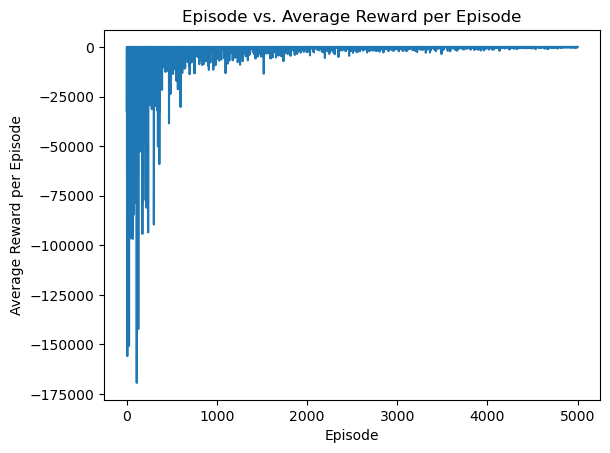

Learned Policy:


[0.]	[3.]	[0.]	[3.]	[2.]	[0.]	[3.]	[0.]	[0.]	[1.]	[1.]	[1.]	

[0.]	[2.]	[1.]	[0.]	[0.]	[1.]	[3.]	[2.]	[1.]	[3.]	[3.]	[0.]	

[2.]	[3.]	[3.]	[3.]	[1.]	[1.]	[3.]	[3.]	[3.]	[3.]	[3.]	[0.]	

[2.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	

In [ ]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Create environment
env = gym.make('CliffWalking-v0')
env.reset()
# Initialize Q-table
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
alpha = 0.1
gamma = 0.9
num_episodes = 5000
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = (epsilon_start - epsilon_end) / num_episodes

# Initialize variables to track rewards and epsilon
rewards = []
epsilons = []
state = 36
# Loop over episodes
for i in range(num_episodes):
    # Reset environment a
    done = False
    total_reward = 0
    epsilon = epsilon_start - epsilon_decay * i

    # Loop over steps in episode
    while not done:
        # Choose an action using an ϵ−Greedy behavior policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        # Take the action and observe the next state and reward
        next_state, reward, truncated, terminated, i= env.step(action)
        done = truncated or terminated

        # Update the Q-table
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

        # Update the current state and total reward
        state = next_state
        total_reward += reward

    # Append the total reward and epsilon to the respective lists
    rewards.append(total_reward)
    epsilons.append(epsilon)

    # Print progress every 100 episodes
    
    

# Plot the learning curve
plt.plot(range(num_episodes), rewards)
plt.title('Episode vs. Average Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Average Reward per Episode')
plt.show()

# Derive the policy from the Q-table
policy = np.zeros([env.observation_space.n, 1])
for i in range(env.observation_space.n):
    policy[i] = np.argmax(q_table[i])

# Print the learned policy
print("Learned Policy:")
for i in range(env.observation_space.n):
    if i % 12 == 0:
        print("\n")
    print(policy[i], end="\t")
